<a href="https://colab.research.google.com/github/retico/cmepda_medphys/blob/master/L6_code/Lecture6_demo3_data_exploration_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data exploration and analysis**

We explore a data sample, create descriptive plots to represent it, and carry out a basic statistical data analysis.

The data used in this demo is a table containing the brain features computed by means of the [FreeSurfer](https://surfer.nmr.mgh.harvard.edu/) segmentation software. A subsample of the large amount of features generated by Freesurfer for the [ABIDE I](http://fcon_1000.projects.nitrc.org/indi/abide/) data cohort is analyzed.  

We will have a quick look at [pandas](https://pandas.pydata.org/), one of the most used python data analysis libraries; we will use [matplotlib](https://matplotlib.org/), a comprehensive library for data visualization, and [seaborn](https://seaborn.pydata.org/), a high level API to matplotlib for statistical data visualization. For statistical data analysis we will introduce the [scipy](https://www.scipy.org/) library.

All these libraries are already installed on Colab. 

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Reading the dataset


We have to read a data table where each row corresponds to a different subject and the columns contain descriptive characteristics of each subjects (e.g. age, IQ, morphometric brain features).
A pandas DataFrames is definitly a suitable object to work with tabular data structures. It is basically a container for and exposes lots of methods to process tabular data. Tabular data are stored in pandas DataFrames, whereas data series (1-dim array) are stored in pandas Series.

Pandas offers plenty of readers out of the box.

In [240]:
[x for x in dir(pd) if 'read' in x ]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Run this cell to mount your Google Drive

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
!ls /content/drive/MyDrive/cmepda_medphys_dataset/FEATURES/Brain_MRI_FS_ABIDE/

FS_features_ABIDE_males.csv		 README.txt
FS_features_ABIDE_males_someGlobals.csv


Let us read a csv file as a pandas DataFrame. 


In [243]:
dataset_file = "/content/drive/MyDrive/cmepda_medphys_dataset/FEATURES/Brain_MRI_FS_ABIDE/FS_features_ABIDE_males_someGlobals.csv"
# check and modify the path of the FS_features_ABIDE_males_someGlobals.csv file you downloaded in your drive

In [244]:
df = pd.read_csv(dataset_file)
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,1,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,1,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


In [245]:
df.head(10)

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,7.012116e+05
1,Caltech_0051457,22.9,1,107.0,1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,8.414859e+05
2,Caltech_0051458,39.2,1,93.0,1,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,7.267282e+05
3,Caltech_0051459,22.8,1,106.0,1,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,7.946765e+05
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,7.141228e+05
5,Caltech_0051464,20.9,1,101.0,1,2.75868,2.77535,381571.7788,394084.8589,303417.2648,305153.4233,1.002587e+06
6,Caltech_0051465,20.2,1,96.0,1,2.64952,2.61226,263116.2604,262123.2839,217074.1083,216872.8290,7.143925e+05
7,Caltech_0051466,27.6,1,106.0,1,2.50905,2.54180,272763.7952,273803.1852,243404.3915,239966.2287,7.204110e+05
8,Caltech_0051467,23.4,1,93.0,1,2.63928,2.65577,318872.1902,318578.9726,270932.7213,270362.5112,8.373972e+05
9,Caltech_0051468,20.1,1,100.0,1,2.67748,2.69659,331159.1900,337979.1470,277939.3387,281162.6978,8.667163e+05


In [246]:
df.tail()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
910,Yale_0050618,12.75,1,76.0,1,2.36238,2.38152,192826.5499,195519.7899,181671.5502,178748.1592,550196.3398
911,Yale_0050622,9.92,1,89.0,1,2.50005,2.52849,252293.1567,257263.1314,210779.7950,210714.3714,691881.2881
912,Yale_0050625,7.00,1,99.0,1,2.70636,2.72184,264309.1936,268447.9865,186742.5963,189804.7237,694421.1801
913,Yale_0050626,11.08,1,61.0,1,2.52114,2.54823,296770.5313,309780.9732,255228.1165,260365.0738,803490.5045
914,Yale_0050628,14.42,1,77.0,1,2.43238,2.50265,227194.7780,238810.8206,219704.4479,221946.7201,627204.5987


Check the size and shape of the DataFrame

In [247]:
df.size

10980

In [248]:
df.shape

(915, 12)

To access a sigle column:

In [249]:
df.FILE_ID

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

In [250]:
df['FILE_ID']

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

We can check that df is a DataFrame, whereas df.FILE_ID, which is a single column, is a pandas Series

In [251]:
print(type(df), type(df.FILE_ID))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


To access a single row

In [252]:
df[0:1]

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651


In [253]:
df[df.FILE_ID=='Caltech_0051461']

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


We can add easily columns to a Dataframe, for example we can add a column containing data derived from the other columns

In [254]:
df['dummy'] = df.DX_GROUP +1
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,dummy
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,2
1,Caltech_0051457,22.9,1,107.0,1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,2
2,Caltech_0051458,39.2,1,93.0,1,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,2
3,Caltech_0051459,22.8,1,106.0,1,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,2
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,2


and we can delete it

In [255]:
del df['dummy']

We can apply functions to the column values. 

For example, since it is hard to remember what DX_GROUP=1 actually means, we can make this column more readable.

First, we select the DX_GROUP column, then we apply a function to all its elements to convert the number to a meaningful label.

In [256]:
df['DX_GROUP'] = df.DX_GROUP.apply(lambda x: 'Controls' if x==-1 else 'ASD')
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
0,Caltech_0051456,55.4,1,126.0,ASD,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859
4,Caltech_0051461,37.7,1,99.0,ASD,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788


In [257]:
df.DX_GROUP.unique()

array(['ASD', 'Controls'], dtype=object)

We can make several operation/computations on the elements of the DataFrame: e.g. we can count the number of entries with a certain label:

In [258]:
print(df[df.DX_GROUP=='ASD'].FILE_ID.count())
print(df[df.DX_GROUP=='Controls'].FILE_ID.count())

451
464


or we can compute the average age of a sample/subsample:

In [259]:
df[df.DX_GROUP=='Controls'].AGE_AT_SCAN.mean()

17.47486573275862

Slicing: to select ranges of rows and/or columns it is possible to use either labels or indices.

In [260]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol'],
      dtype='object')

using column labels (.loc)

In [261]:
selected_feat = df.loc[:,'lh_MeanThickness':'rhCortexVol']
selected_feat.head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol
0,2.52039,2.52379,258703.4443,262670.1207
1,2.55533,2.56998,321132.1284,317004.7945
2,2.64518,2.63160,266418.9917,266456.1701
3,2.70814,2.72762,307157.4469,310540.0389
4,2.59002,2.61012,263932.5269,269417.2519


using column indices (.iloc)

In [262]:
df.iloc[:,5:9].head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol
0,2.52039,2.52379,258703.4443,262670.1207
1,2.55533,2.56998,321132.1284,317004.7945
2,2.64518,2.63160,266418.9917,266456.1701
3,2.70814,2.72762,307157.4469,310540.0389
4,2.59002,2.61012,263932.5269,269417.2519


In [263]:
df.iloc[1:4,:].head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859


# Representing data



## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb045049ed0>]],
      dtype=object)

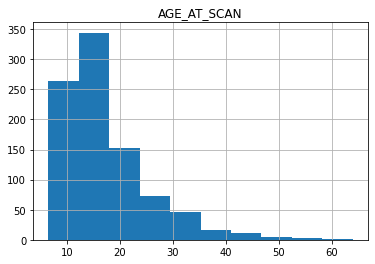

In [264]:
df.hist('AGE_AT_SCAN')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb044fe6d50>,
      dtype=object)

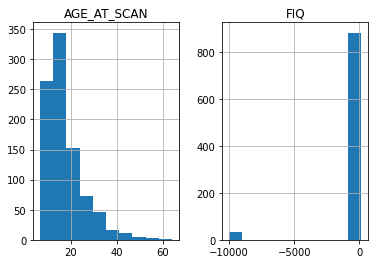

In [265]:
df.hist(['AGE_AT_SCAN','FIQ'])

By convention, in this dataset missing values in the FIQ column are indicated as either -9999 or 0

In [266]:
df.FIQ[:20]

0      126.0
1      107.0
2       93.0
3      106.0
4       99.0
5      101.0
6       96.0
7      106.0
8       93.0
9      100.0
10     104.0
11     124.0
12     125.0
13   -9999.0
14     100.0
15     104.0
16     123.0
17      97.0
18     116.0
19     117.0
Name: FIQ, dtype: float64

We can mask these entries:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb044ed4d10>]],
      dtype=object)

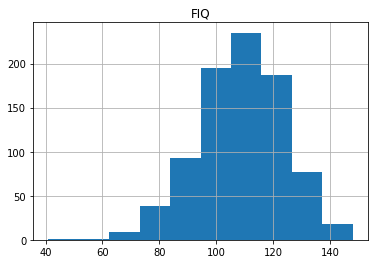

In [267]:
df[df.FIQ>0].hist('FIQ')

## Plots

Let's have a look at the DataFrame methods for data plotting

In [268]:
[x for x in dir(df) if 'plot' in x ]

['boxplot', 'plot']

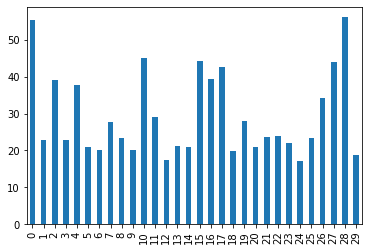

In [269]:
df.AGE_AT_SCAN[:30].plot(kind='bar')

## Boxplots

Boxplot are very useful in analysis reports. We can for example visually check whether two cohorts are matched for some parameters (e.g. age).

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


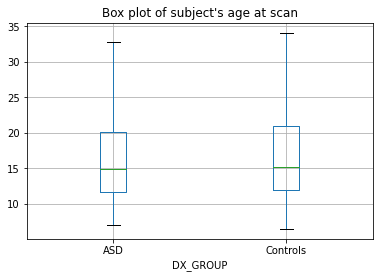

In [270]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');

If we want, for example, to group subjects according to the acquisition site, we have to retrive this information in the DataFrame. We find out that the site name is a part of the FILE_ID.

We can use the .split method available for the strings, and use it on the DataFrame column elements by defining a suitable lambda function. 

In [271]:
df.FILE_ID

0      Caltech_0051456
1      Caltech_0051457
2      Caltech_0051458
3      Caltech_0051459
4      Caltech_0051461
            ...       
910       Yale_0050618
911       Yale_0050622
912       Yale_0050625
913       Yale_0050626
914       Yale_0050628
Name: FILE_ID, Length: 915, dtype: object

In [272]:
df.FILE_ID[0].split('_')[0]

'Caltech'

We add the "Site" column to the DataFrame

In [273]:
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,Site
0,Caltech_0051456,55.4,1,126.0,ASD,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,Caltech
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,Caltech
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,Caltech
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,Caltech
4,Caltech_0051461,37.7,1,99.0,ASD,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,Caltech


We can make a boxplot representing the age values for each acquisition site.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


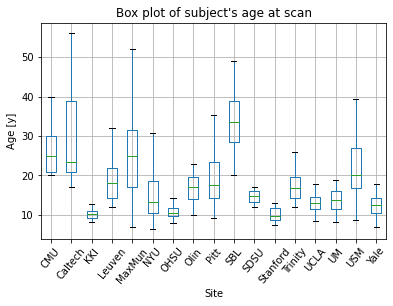

In [274]:
boxplot = df.boxplot(column=['AGE_AT_SCAN'], by='Site', showfliers=False)
boxplot.set_title('Box plot of subject\'s age at scan')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('Age [y]')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);

The [seaborn](https://seaborn.pydata.org/) API interoperates well with pandas DataFrame and allows us to refer to columns by label

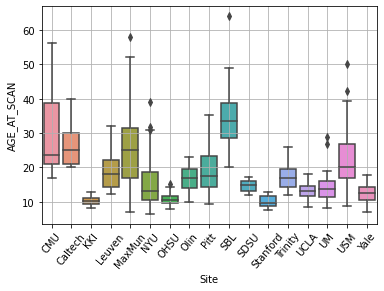

In [275]:
import seaborn as sns
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

We can visually compare the measured values across different sites.

In [276]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'Site'],
      dtype='object')

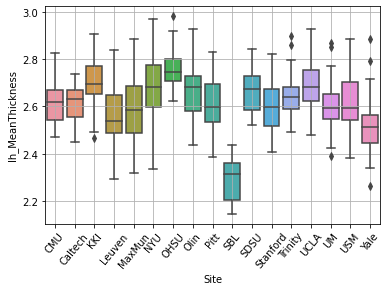

In [277]:
import seaborn as sns
sns_boxplot = sns.boxplot(x='Site', y='lh_MeanThickness', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

## Grouping

Data can be grouped by feature and visualized according to a given aggregation function

In [278]:
site_counts = df.groupby('Site').count()
site_counts

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol
Site,,,,,,,,,,,,
CMU,21,21,21,21,21,21,21,21,21,21,21,21
Caltech,30,30,30,30,30,30,30,30,30,30,30,30
KKI,42,42,42,42,42,42,42,42,42,42,42,42
Leuven,55,55,55,55,55,55,55,55,55,55,55,55
MaxMun,47,47,47,47,47,47,47,47,47,47,47,47
NYU,147,147,147,147,147,147,147,147,147,147,147,147
OHSU,28,28,28,28,28,28,28,28,28,28,28,28
Olin,31,31,31,31,31,31,31,31,31,31,31,31
Pitt,48,48,48,48,48,48,48,48,48,48,48,48


In [279]:
site_counts = df.groupby('Site')['FILE_ID'].count()
site_counts

Site
CMU          21
Caltech      30
KKI          42
Leuven       55
MaxMun       47
NYU         147
OHSU         28
Olin         31
Pitt         48
SBL          30
SDSU         28
Stanford     30
Trinity      49
UCLA         85
UM          103
USM         101
Yale         40
Name: FILE_ID, dtype: int64

It is quite easy to obtain a bar plot from a pandas Series

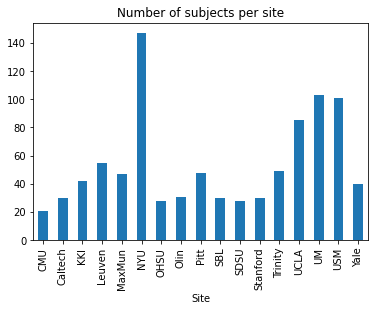

In [280]:
site_counts.plot(kind='bar', title='Number of subjects per site')


Now let's try to create a stacked bar plot showing the DX_GROUP, i.e. how many ASD and how many controls are available at each single site

In [281]:
stack = df.groupby(['Site', 'DX_GROUP'])['FILE_ID'].count()
stack

Site      DX_GROUP
CMU       ASD         11
          Controls    10
Caltech   ASD         15
          Controls    15
KKI       ASD         18
          Controls    24
Leuven    ASD         26
          Controls    29
MaxMun    ASD         19
          Controls    28
NYU       ASD         68
          Controls    79
OHSU      ASD         13
          Controls    15
Olin      ASD         17
          Controls    14
Pitt      ASD         26
          Controls    22
SBL       ASD         15
          Controls    15
SDSU      ASD         13
          Controls    15
Stanford  ASD         15
          Controls    15
Trinity   ASD         24
          Controls    25
UCLA      ASD         46
          Controls    39
UM        ASD         47
          Controls    56
USM       ASD         58
          Controls    43
Yale      ASD         20
          Controls    20
Name: FILE_ID, dtype: int64

In [282]:
unstacked = stack.unstack('DX_GROUP')
unstacked

DX_GROUP,ASD,Controls
Site,,
CMU,11,10
Caltech,15,15
KKI,18,24
Leuven,26,29
MaxMun,19,28
NYU,68,79
OHSU,13,15
Olin,17,14
Pitt,26,22


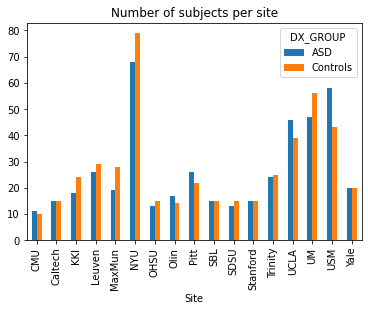

In [283]:
unstacked.plot(kind='bar', stacked=False, title='Number of subjects per site')

We can select a number of columns (data slicing)

In [284]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'Site'],
      dtype='object')

In [285]:
selected_feat = df.loc[:,'lh_MeanThickness':'rhCortexVol']
selected_feat.head()

,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol
0,2.52039,2.52379,258703.4443,262670.1207
1,2.55533,2.56998,321132.1284,317004.7945
2,2.64518,2.63160,266418.9917,266456.1701
3,2.70814,2.72762,307157.4469,310540.0389
4,2.59002,2.61012,263932.5269,269417.2519


Let's see how our selection looks like with the seaborn pairplot!

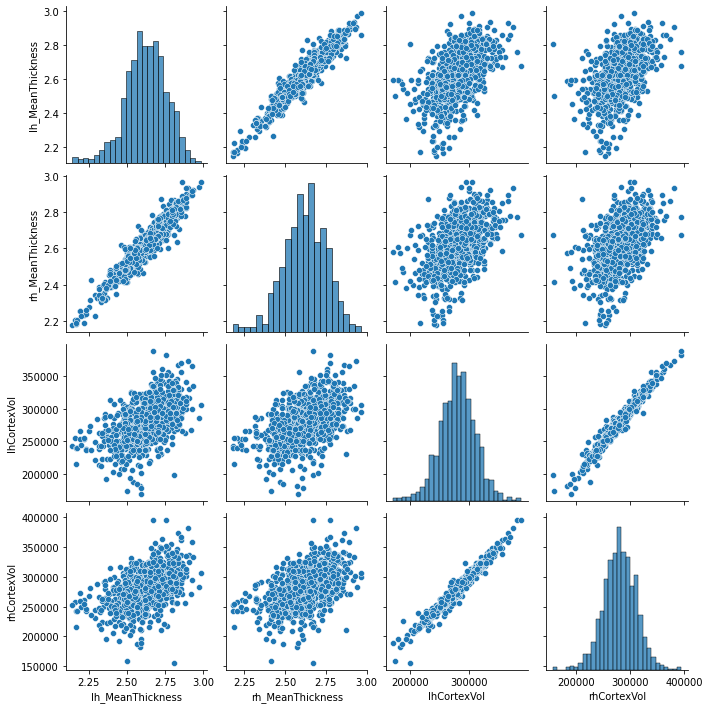

In [286]:
sns.pairplot(selected_feat)

# Basic data analysis

To carry out basic data analysis, we use the [SciPy](https://www.scipy.org/scipylib/index.html) library, which provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics.

In [287]:
import scipy.stats

## Finding outliers in the distributions

In [288]:
df.columns

Index(['FILE_ID', 'AGE_AT_SCAN', 'SEX', 'FIQ', 'DX_GROUP', 'lh_MeanThickness',
       'rh_MeanThickness', 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol',
       'Site'],
      dtype='object')

We select the 7 columns reporting the brain measures

In [289]:
data = df.iloc[:,5:12]

We use the z-score as a criterion to determine the presence of outliers.

Z-score is defined as:

$z(x) = \frac{x - \bar{x}}{\sigma}$. 

Data with a z-score above 3 (beyond 3$\sigma$ from the mean) are considered as outliers of the distribution.

In [290]:
df_no_outliers=df[(abs(scipy.stats.zscore(data)) < 3).all(axis=1)]  
# .all Return whether all elements are True, potentially over an axis.
df_no_outliers.shape

(893, 13)

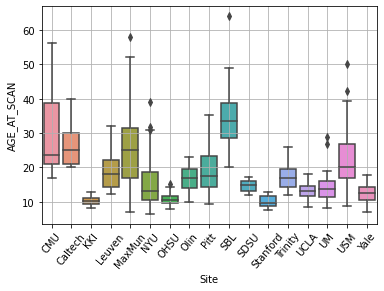

In [291]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

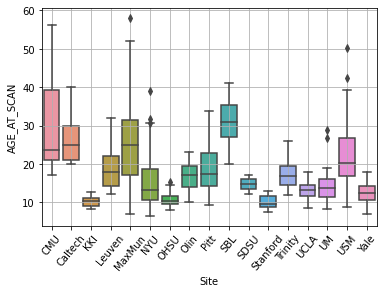

In [292]:
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df_no_outliers)
sns_boxplot.set_xticklabels(labels=boxplot.get_xticklabels(), rotation=50);
sns_boxplot.grid()

## Statistical analysis

Is there any significant difference in the AGE_AT_SCAN and FIQ features between the two diagnostic categories?

In [293]:
df_ASD = df[df.DX_GROUP == 'ASD']
df_CTR = df[df.DX_GROUP == 'Controls']

First of all we have to check for normality of our data distributions. We can use the 
`scipy.stats.normaltest` which test whether a sample differs from a normal distribution.


In [294]:
k2, p_asd = scipy.stats.normaltest(df_ASD.AGE_AT_SCAN)
k2, p_ctr = scipy.stats.normaltest(df_CTR.AGE_AT_SCAN)
p_asd, p_ctr

(7.754904468505647e-42, 4.366359373856672e-28)

In [295]:
test_res = scipy.stats.mannwhitneyu(df_ASD.AGE_AT_SCAN, df_CTR.AGE_AT_SCAN)
test_res

MannwhitneyuResult(statistic=102278.5, pvalue=0.27801919589384394)

We can do the same analysis for the FIQ.
First we have to remove from the dataframes the entries with FIQ = -9999.

In [296]:
df_ASD = df_ASD[df_ASD.FIQ >0]
df_CTR = df_CTR[df_CTR.FIQ >0]

In [297]:
k2, p_asd = scipy.stats.normaltest(df_ASD.FIQ)
k2, p_ctr = scipy.stats.normaltest(df_CTR.FIQ)
p_asd, p_ctr

(0.5917444872576755, 0.4198194732498861)

We can run in this case either the t-test or the Wilcoxon-Mann-Whitney test:

In [298]:
test_res = scipy.stats.ttest_ind(df_ASD.FIQ, df_CTR.FIQ)
test_res

Ttest_indResult(statistic=-5.971855367971283, pvalue=3.4416393040927738e-09)

In [299]:
test_res = scipy.stats.mannwhitneyu(df_ASD.FIQ, df_CTR.FIQ)
test_res

MannwhitneyuResult(statistic=70760.0, pvalue=7.60834710749306e-09)

Let us define a new index of left-right asimmetry of the mean cortical thickness

In [300]:
def LR(data):
  LR = data.lh_MeanThickness-data.rh_MeanThickness
  LR /= 0.5*(data.rh_MeanThickness+data.lh_MeanThickness)
  data['LR'] = LR
  return data

In [301]:
data = LR(df)
data.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,Site,LR
0,Caltech_0051456,55.4,1,126.0,ASD,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,Caltech,-0.001348
1,Caltech_0051457,22.9,1,107.0,ASD,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,Caltech,-0.005717
2,Caltech_0051458,39.2,1,93.0,ASD,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,Caltech,0.005147
3,Caltech_0051459,22.8,1,106.0,ASD,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,Caltech,-0.007167
4,Caltech_0051461,37.7,1,99.0,ASD,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,Caltech,-0.007731


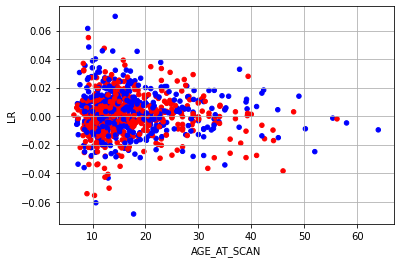

In [302]:
color = data.DX_GROUP.apply(lambda x:'blue' if x == 'ASD' else 'red')
ax = data.plot(x='AGE_AT_SCAN', y='LR', kind='scatter', color=color);
ax.grid()

In [303]:
data.DX_GROUP.unique()

array(['ASD', 'Controls'], dtype=object)

In [304]:
LR_ASD = data[data['DX_GROUP'] == 'ASD']['LR']
LR_CTR = data[data['DX_GROUP'] == 'Controls']['LR']

In [305]:
k2, p_asd = scipy.stats.normaltest(LR_ASD)
k2, p_ctr = scipy.stats.normaltest(LR_CTR)
p_asd, p_ctr

(3.709857854254616e-06, 0.00022465190017034194)

In [306]:
scipy.stats.mannwhitneyu(LR_ASD, LR_CTR)

MannwhitneyuResult(statistic=91231.0, pvalue=0.0003998922620530189)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


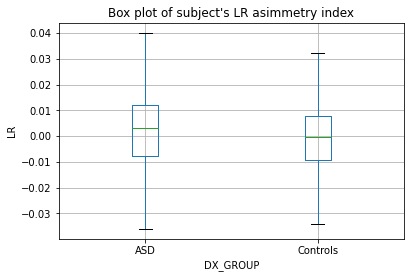

In [307]:
boxplot = df.boxplot(column=['LR'], by='DX_GROUP', showfliers=False)
boxplot.set_title('Box plot of subject\'s LR asimmetry index')
boxplot.get_figure().suptitle('');
boxplot.set_ylabel('LR')

boxplot.set_xticklabels(labels=boxplot.get_xticklabels());

We can compute the effect size in terms of Cohen's *d* index. 

A population effect size based on means usually computed as:

$d = \frac{\mu_1-\mu_2}{\sigma}$




In [308]:
d_cohen = (LR_ASD.mean()-LR_CTR.mean())/data['LR'].std()
d_cohen

0.2194601644424404

## Correlations among variables

Let's have a look at the data from a correlation perspective: can we spot any relationship? 

In [309]:
data.drop('SEX', axis=1).corr()

,AGE_AT_SCAN,FIQ,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,LR
AGE_AT_SCAN,1.000000,-0.302034,-0.582304,-0.586038,-0.262530,-0.250016,0.438887,0.430706,-0.212807,-0.039969
FIQ,-0.302034,1.000000,0.365001,0.348166,0.062747,0.049527,-0.227115,-0.210528,0.037634,0.096843
lh_MeanThickness,-0.582304,0.365001,1.000000,0.955238,0.529479,0.493574,-0.278798,-0.281760,0.467387,0.232968
rh_MeanThickness,-0.586038,0.348166,0.955238,1.000000,0.509903,0.508397,-0.288463,-0.287313,0.464578,-0.064748
lhCortexVol,-0.262530,0.062747,0.529479,0.509903,1.000000,0.981343,0.470413,0.466139,0.974726,0.107532
rhCortexVol,-0.250016,0.049527,0.493574,0.508397,0.981343,1.000000,0.470385,0.481971,0.974743,-0.007945
lhCerebralWhiteMatterVol,0.438887,-0.227115,-0.278798,-0.288463,0.470413,0.470385,1.000000,0.992170,0.524847,0.005129
rhCerebralWhiteMatterVol,0.430706,-0.210528,-0.281760,-0.287313,0.466139,0.481971,0.992170,1.000000,0.527529,-0.007727
TotalGrayVol,-0.212807,0.037634,0.467387,0.464578,0.974726,0.974743,0.524847,0.527529,1.000000,0.047787
LR,-0.039969,0.096843,0.232968,-0.064748,0.107532,-0.007945,0.005129,-0.007727,0.047787,1.000000


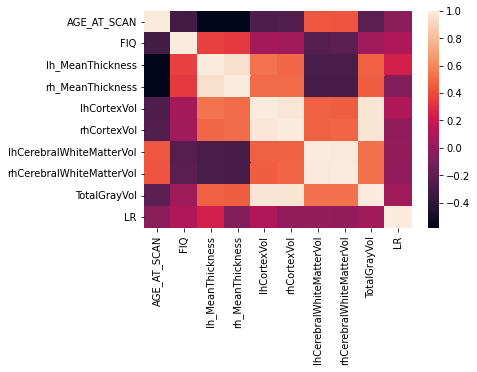

In [310]:
sns.heatmap(data.drop('SEX', axis=1).corr());

In [311]:
res = scipy.stats.pearsonr(data['rhCortexVol'], data['lhCortexVol'])

In [312]:
res = scipy.stats.pearsonr(data['TotalGrayVol'], data['LR'])
res

(0.047787118800281, 0.1486376784929164)

# Conclusions

We've had an extremely quick overview of data exploration, visualization and statistical analysis methods.

To learn more for example about the possible alterations of the left-righ brain asymmetry in ASD you can  read the recent work by
Postema MC, *et al.*, [ENIGMA ASD](http://enigma.ini.usc.edu/ongoing/enigma-asd-working-group/) working group, [*Altered structural brain asymmetry in autism spectrum disorder in a study of 54 datasets*](https://www.nature.com/articles/s41467-019-13005-8), Nat Commun. 2019 10(1):4958. doi:
10.1038/s41467-019-13005-8.